In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors, linear_model, model_selection, metrics
import seaborn as sns

In [2]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('preprocessed_data_craigslist.csv').drop(
    ['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 4818 non-null   float64
 1   numimage              4818 non-null   float64
 2   condition             2762 non-null   float64
 3   bicycleframematerial  4818 non-null   object 
 4   bicycletype           4818 non-null   object 
 5   braketype             4818 non-null   object 
 6   electricassist        4818 non-null   int64  
 7   framesize             1770 non-null   float64
 8   handlebartype         4818 non-null   object 
 9   suspension            4818 non-null   int64  
 10  wheelsize             1962 non-null   float64
 11  sizedimensions        4818 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 451.8+ KB


In [4]:
kept_var = ['braketype', 'condition', 'bicycleframematerial', 'electricassist', 'wheelsize', 'bicycletype', 'numimage', 'handlebartype']

df = df[['price'] + kept_var]
df

,price,braketype,condition,bicycleframematerial,electricassist,wheelsize,bicycletype,numimage,handlebartype
0,1000.0,unknown,NaN,unknown,0,NaN,unknown,10.0,unknown
1,2995.0,unknown,4.0,carbon fiber,0,NaN,road,20.0,unknown
2,30.0,unknown,4.0,unknown,0,NaN,unknown,6.0,unknown
3,125.0,special,3.0,aluminum,0,26.0,mountain,9.0,special
4,75.0,mechanical,1.0,aluminum,0,NaN,mountain,0.0,unknown
...,...,...,...,...,...,...,...,...,...
4813,75.0,unknown,NaN,unknown,0,26.0,unknown,2.0,unknown
4814,100.0,mechanical,2.0,aluminum,0,24.0,mountain,2.0,unknown
4815,110.0,unknown,3.0,unknown,0,NaN,unknown,10.0,unknown
4816,50.0,unknown,4.0,unknown,0,NaN,unknown,3.0,unknown


In [5]:
df = df[(10 < df.price) & (df.price < 800)
        ].reset_index().drop(['index'], axis=1)
df

,price,braketype,condition,bicycleframematerial,electricassist,wheelsize,bicycletype,numimage,handlebartype
0,30.0,unknown,4.0,unknown,0,NaN,unknown,6.0,unknown
1,125.0,special,3.0,aluminum,0,26.0,mountain,9.0,special
2,75.0,mechanical,1.0,aluminum,0,NaN,mountain,0.0,unknown
3,500.0,unknown,NaN,unknown,0,NaN,unknown,0.0,unknown
4,42.0,unknown,NaN,alloy,0,NaN,mountain,18.0,unknown
...,...,...,...,...,...,...,...,...,...
3521,75.0,unknown,NaN,unknown,0,26.0,unknown,2.0,unknown
3522,100.0,mechanical,2.0,aluminum,0,24.0,mountain,2.0,unknown
3523,110.0,unknown,3.0,unknown,0,NaN,unknown,10.0,unknown
3524,50.0,unknown,4.0,unknown,0,NaN,unknown,3.0,unknown


In [6]:
pd.get_dummies(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              3526 non-null   float64
 1   condition                          2062 non-null   float64
 2   electricassist                     3526 non-null   int64  
 3   wheelsize                          1511 non-null   float64
 4   numimage                           3526 non-null   float64
 5   braketype_hydraulic                3526 non-null   uint8  
 6   braketype_mechanical               3526 non-null   uint8  
 7   braketype_special                  3526 non-null   uint8  
 8   braketype_unknown                  3526 non-null   uint8  
 9   bicycleframematerial_alloy         3526 non-null   uint8  
 10  bicycleframematerial_aluminum      3526 non-null   uint8  
 11  bicycleframematerial_carbon fiber  3526 non-null   uint8

In [7]:
X = pd.get_dummies(df.drop(columns=['price']))
display(X)
y = df.price

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25,random_state=52)

,condition,electricassist,wheelsize,numimage,braketype_hydraulic,braketype_mechanical,braketype_special,braketype_unknown,bicycleframematerial_alloy,bicycleframematerial_aluminum,...,bicycletype_kids,bicycletype_mountain,bicycletype_recumbent/trike,bicycletype_road,bicycletype_tandem,bicycletype_track,bicycletype_unicycle,bicycletype_unknown,handlebartype_special,handlebartype_unknown
0,4.0,0,NaN,6.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,3.0,0,26.0,9.0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1.0,0,NaN,0.0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,NaN,0,NaN,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,NaN,0,NaN,18.0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,NaN,0,26.0,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3522,2.0,0,24.0,2.0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3523,3.0,0,NaN,10.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3524,4.0,0,NaN,3.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


### Preprocessing (scaling)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)

x_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)

x_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

X_train, X_test

(      condition  electricassist  wheelsize  numimage  braketype_hydraulic  \
 0      1.000000             0.0        NaN  0.208333                  0.0   
 1      1.000000             0.0        NaN  0.208333                  0.0   
 2      0.666667             0.0   0.842105  0.416667                  0.0   
 3      1.000000             0.0   0.736842  0.083333                  0.0   
 4      1.000000             0.0        NaN  0.083333                  0.0   
 ...         ...             ...        ...       ...                  ...   
 2639   0.666667             0.0   0.842105  0.166667                  0.0   
 2640   0.666667             0.0   0.842105  0.083333                  0.0   
 2641   0.333333             0.0        NaN  0.250000                  0.0   
 2642   0.666667             0.0        NaN  0.083333                  0.0   
 2643        NaN             0.0        NaN  1.000000                  0.0   
 
       braketype_mechanical  braketype_special  braketype_unkn

### Preprocessing (inputing)

In [9]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = pd.DataFrame(data=imp_mean.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=imp_mean.fit_transform(X_test), columns=X_test.columns)

X_train

,condition,electricassist,wheelsize,numimage,braketype_hydraulic,braketype_mechanical,braketype_special,braketype_unknown,bicycleframematerial_alloy,bicycleframematerial_aluminum,...,bicycletype_kids,bicycletype_mountain,bicycletype_recumbent/trike,bicycletype_road,bicycletype_tandem,bicycletype_track,bicycletype_unicycle,bicycletype_unknown,handlebartype_special,handlebartype_unknown
0,1.000000,0.0,0.697428,0.208333,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.0,0.697428,0.208333,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.666667,0.0,0.842105,0.416667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,0.0,0.736842,0.083333,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.000000,0.0,0.697428,0.083333,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,0.666667,0.0,0.842105,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2640,0.666667,0.0,0.842105,0.083333,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2641,0.333333,0.0,0.697428,0.250000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2642,0.666667,0.0,0.697428,0.083333,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Linear Regression

In [10]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

In [11]:
linear_regression.intercept_

1767171684758129.5

In [12]:
linear_regression.coef_

array([ 1.23861609e+02,  2.56784384e+02,  1.83385449e+02,  1.24006060e+02,
       -9.57160027e+14, -9.57160027e+14, -9.57160027e+14, -9.57160027e+14,
       -2.76121806e+14, -2.76121806e+14, -2.76121806e+14, -2.76121806e+14,
       -2.76121806e+14, -2.76121806e+14, -2.76121806e+14, -8.66750280e+13,
       -8.66750280e+13, -8.66750280e+13, -8.66750280e+13, -8.66750280e+13,
       -8.66750280e+13, -8.66750280e+13, -8.66750280e+13, -8.66750280e+13,
       -8.66750280e+13, -8.66750280e+13, -8.66750280e+13, -8.66750280e+13,
       -8.66750280e+13, -8.66750280e+13, -4.47214824e+14, -4.47214824e+14])

In [13]:
y_pred = linear_regression.predict(X_test)
print('Coefficients: \n', linear_regression.coef_, len(linear_regression.coef_))
# The mean squared error
print("RMSE: %.2f" %
      sqrt(np.mean((linear_regression.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_regression.score(X_test, y_test))

Coefficients: 
 [ 1.23861609e+02  2.56784384e+02  1.83385449e+02  1.24006060e+02
 -9.57160027e+14 -9.57160027e+14 -9.57160027e+14 -9.57160027e+14
 -2.76121806e+14 -2.76121806e+14 -2.76121806e+14 -2.76121806e+14
 -2.76121806e+14 -2.76121806e+14 -2.76121806e+14 -8.66750280e+13
 -8.66750280e+13 -8.66750280e+13 -8.66750280e+13 -8.66750280e+13
 -8.66750280e+13 -8.66750280e+13 -8.66750280e+13 -8.66750280e+13
 -8.66750280e+13 -8.66750280e+13 -8.66750280e+13 -8.66750280e+13
 -8.66750280e+13 -8.66750280e+13 -4.47214824e+14 -4.47214824e+14] 32
RMSE: 166.29
Variance score: 0.12


In [14]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred = df_pred[(df_pred['Predicted'] > 20) & (df_pred['Predicted'] < 2000)]
df_pred

,Actual,Predicted
2247,125.0,110.50
1331,50.0,155.25
270,50.0,136.00
1255,60.0,102.25
3347,400.0,124.75
...,...,...
1382,288.0,152.25
1151,299.0,264.25
272,200.0,180.00
2195,100.0,334.25


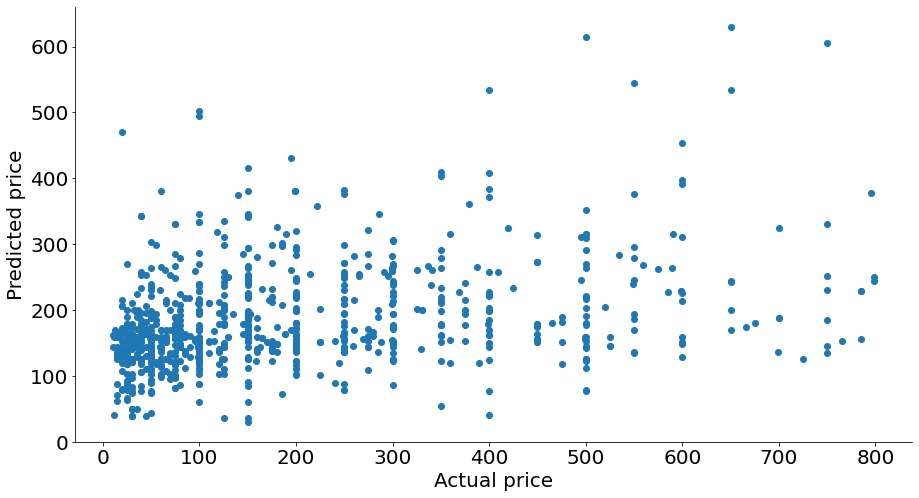

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 8))
plt.scatter(df_pred['Actual'], df_pred['Predicted'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)

sns.despine()

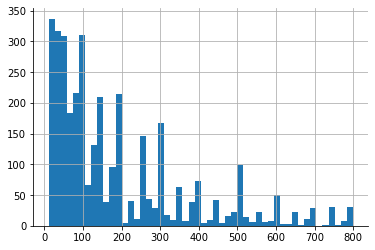

In [16]:
df['price'].hist(bins=50)
sns.despine()

In [17]:
#import statsmodels.api as sm
# X_train = sm.add_constant(X_train) # adding a constant
# X_test = sm.add_constant(X_test) # adding a constant
#
#
#model = sm.OLS(y_train, X_train).fit()
#predictions = model.predict(X_test)
#
#print_model = model.summary()
# print(print_model)

# KNN

In [18]:
rmse_val = []  # to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, y_train)  # fit the model
    pred = model.predict(X_test)  # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred))  # calculate rmse
    rmse_val.append(error)  # store rmse values
fit_df = pd.DataFrame({'k': range(1, 41), 'RMSE': rmse_val}).set_index('k')
display(fit_df)
best_k = int(fit_df.idxmin())
best_k

,RMSE
k,
1,191.724354
2,181.144086
3,175.210273
4,174.786653
5,173.995926
6,171.603755
7,170.913374
8,170.237001
9,167.533619


14

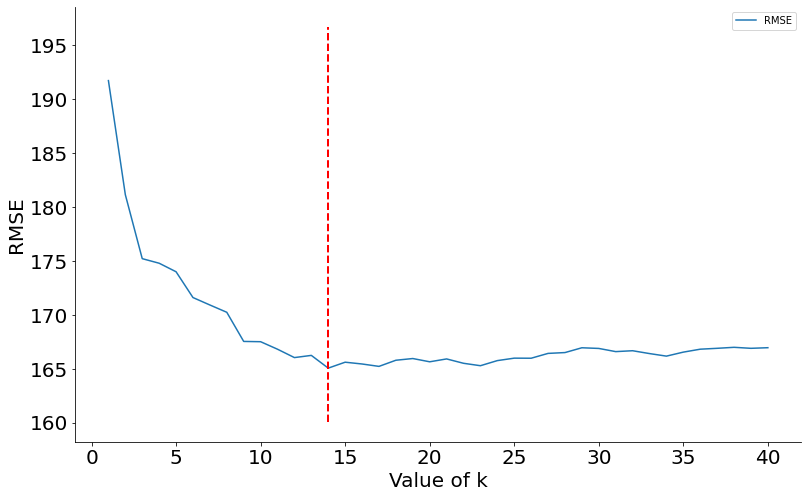

In [19]:
fit_df.plot(ylabel='RMSE', figsize=[13, 8], fontsize=20)
plt.plot([best_k, best_k], [fit_df['RMSE'].min()-5, fit_df['RMSE'].max()+5], color='red',
         linestyle='dashed', linewidth=2)
plt.ylabel('RMSE',fontsize=20)
plt.xlabel('Value of k',fontsize=20)

sns.despine()

In [20]:
model_KNN = neighbors.KNeighborsRegressor(n_neighbors=best_k)
model_KNN.fit(X_train, y_train)  # fit the model
pred_KNN = model_KNN.predict(X_test)

In [21]:
df_pred_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': pred_KNN})
df_pred_KNN = df_pred_KNN[(df_pred_KNN['Predicted'] > 20) & (
    df_pred_KNN['Predicted'] < 2000)]
df_pred_KNN

,Actual,Predicted
2247,125.0,161.000000
1331,50.0,208.571429
270,50.0,59.285714
1255,60.0,160.357143
3347,400.0,98.785714
...,...,...
1382,288.0,134.285714
1151,299.0,299.000000
272,200.0,119.642857
2195,100.0,327.785714


In [22]:
# Linear Regression vs KNN
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))

RMSE for linear regression :  166.2859484517388
RMSE for KNN with best K :  165.05830926999096


# Random Forest Regression

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid = {
    'n_estimators': [400, 500, 600, 700],
    'max_features': ['sqrt','log2'],
    'max_depth' : [5, 6, 7, 8],
    'random_state' : [52]
 }

#Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [400, 500, 600, 700],
                         'random_state': [52]})

In [57]:

# Output is :

'''
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 52}
 '''

CV_rfr.best_params_


{'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 700,
 'random_state': 52}

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_features='sqrt',
                           max_depth=7, random_state=52).fit(X_train, y_train)
pred_RF = rf.predict(X_test)
mse = mean_squared_error(y_test, pred_RF)
rmse = mse**.5
print(rmse)

162.4778844411817


In [25]:
df_pred_RF = pd.DataFrame({'Actual': y_test, 'Predicted': pred_RF})
df_pred_RF = df_pred_RF[(df_pred_RF['Predicted'] > 20)
                        & (df_pred_RF['Predicted'] < 2000)]
df_pred_RF

,Actual,Predicted
2247,125.0,129.878148
1331,50.0,178.366352
270,50.0,138.759662
1255,60.0,136.624509
3347,400.0,150.859993
...,...,...
1382,288.0,220.301704
1151,299.0,262.141343
272,200.0,177.260900
2195,100.0,256.407338


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

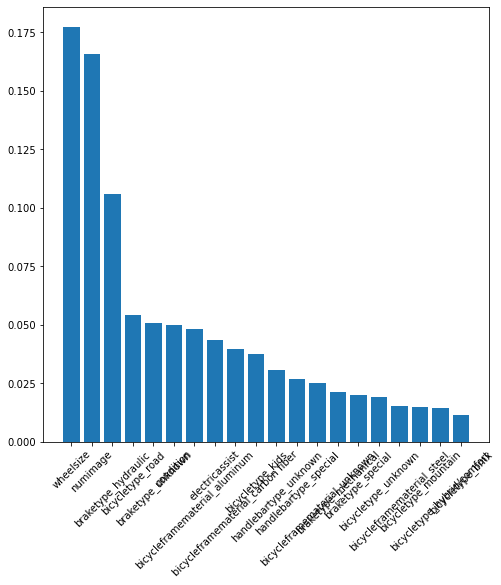

In [26]:
plt.figure(figsize=(8,8))
a,b = zip(*sorted(zip(rf.feature_importances_,X_train.columns),reverse=True))
plt.bar(b[:20],a[:20])

plt.xticks(rotation=45)

# Sum-up

In [27]:
# Linear Regression vs KNN vs RF
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))
print('RMSE for RF with best params : ', sqrt(
    mean_squared_error(y_test, pred_RF)))


RMSE for linear regression :  166.2859484517388
RMSE for KNN with best K :  165.05830926999096
RMSE for RF with best params :  162.4778844411817


In [45]:
df_pred_sum_up = pd.DataFrame({'Actual': y_test,'Predicted with Linear Regression':y_pred,'Predicted with KNN k ='+str(best_k):pred_KNN,'Predicted with Random Forest': pred_RF})
average_pred = df_pred_sum_up.drop("Actual",axis=1).mean(axis=1)
df_pred_sum_up['Average']=average_pred

df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Linear Regression'] > 20)
                        & (df_pred_sum_up['Predicted with Linear Regression'] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with KNN k ='+str(best_k)] > 20)
                        & (df_pred_sum_up['Predicted with KNN k ='+str(best_k)] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Random Forest'] > 20)
                        & (df_pred_sum_up['Predicted with Random Forest'] < 2000)]

df_pred_sum_up.reset_index().drop('index',axis=1)

,Actual,Predicted with Linear Regression,Predicted with KNN k =14,Predicted with Random Forest,Average
0,125.0,110.50,161.000000,129.878148,133.792716
1,50.0,155.25,208.571429,178.366352,180.729260
2,50.0,136.00,59.285714,138.759662,111.348459
3,60.0,102.25,160.357143,136.624509,133.077217
4,400.0,124.75,98.785714,150.859993,124.798569
...,...,...,...,...,...
871,288.0,152.25,134.285714,220.301704,168.945806
872,299.0,264.25,299.000000,262.141343,275.130448
873,200.0,180.00,119.642857,177.260900,158.967919
874,100.0,334.25,327.785714,256.407338,306.147684


In [51]:
df_pred_sum_up[['Actual','Average']]

,Actual,Average
2247,125.0,133.792716
1331,50.0,180.729260
270,50.0,111.348459
1255,60.0,133.077217
3347,400.0,124.798569
...,...,...
1382,288.0,168.945806
1151,299.0,275.130448
272,200.0,158.967919
2195,100.0,306.147684


In [29]:
print('RMSE for Average : ', sqrt(
    mean_squared_error(y_test, average_pred)))

RMSE for Average :  161.89387809482534


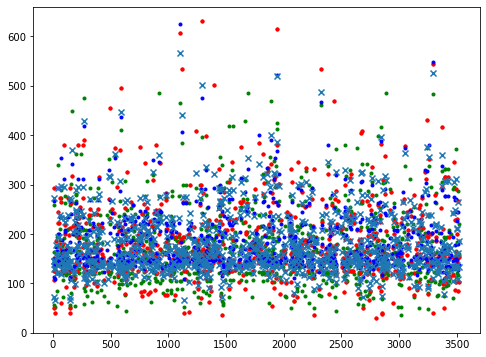

In [30]:
x = df_pred_sum_up.index

fig = plt.figure(figsize=(8,6))  #setting the figure size
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 

plt.scatter(x, df_pred_sum_up['Predicted with KNN k ='+str(best_k)],marker='.',color='g') 
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 
plt.scatter(x, df_pred_sum_up['Predicted with Random Forest'],marker='.',color='b') 
plt.scatter(x,df_pred_sum_up['Average'],marker='x')

plt.show()

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

#Grid Search function
CV_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=parameters, cv= 5)
CV_gb.fit(X_train, y_train)


NameError: name 'GridSearchCV' is not defined

In [ ]:
CV_gb.best_params_

In [ ]:

reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=10, n_estimators=80, subsample=0.5, random_state=52)
reg.fit(X_train, y_train)

np.sqrt(np.mean((reg.predict(X_test)- y_test)**2))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

np.sqrt(np.mean((ada.predict(X_test)- y_test)**2))

In [ ]:
import xgboost as xgb

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

CV_xgb = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=params, cv= 5, verbose=True)
CV_xgb.fit(X_train, y_train)

In [ ]:
CV_xgb.best_params_

In [ ]:

model=xgb.XGBRegressor()
model.fit(X_train, y_train)
np.sqrt(np.mean((model.predict(X_test)- y_test)**2))

In [40]:
df_theo = pd.DataFrame(columns = X_test.columns)
df_theo['condition'] = [4.0]
df_theo['electricassist'] = [0]
df_theo['wheelsize'] = [29.0]
df_theo['numimage'] = [5.0]
df_theo['bicycleframematerial_steel'] = [1.0]
df_theo['braketype_unknown'] = [1.0]
df_theo['handlebartype_special'] = [1.0]
df_theo['bicycletype_road'] = [1.0]
df_theo = df_theo.fillna(0)
display(df_theo)








#{'price':[450],'braketype':['unknown'],'condition':[4.0],'bicycleframematerial':['steel'],'electricassist':[0],'wheelsize':[29.0],'bicycletype':['road'],'numimage':[5.0],'handlebartype':['drop']},
print("Prediction for Theo Before Scaling \n")
pred_LR_theo = linear_regression.predict(df_theo)
print("Prediction with LR : ",pred_LR_theo)
pred_KNN_theo = model_KNN.predict(df_theo)
print("Prediction with KNN : ",pred_KNN_theo)
pred_RF_theo = rf.predict(df_theo)
print("Prediction with RF : ",pred_RF_theo)


df_theo_scaled = scaler.transform(df_theo)
df_theo = pd.DataFrame(df_theo_scaled, columns=df_theo.columns)


print("\n Prediction for Theo After Scaling \n")

pred_LR_theo = linear_regression.predict(df_theo)
print("Prediction with LR : ",pred_LR_theo)
pred_KNN_theo = model_KNN.predict(df_theo)
print("Prediction with KNN : ",pred_KNN_theo)
pred_RF_theo = rf.predict(df_theo)
print("Prediction with RF : ",pred_RF_theo)

,condition,electricassist,wheelsize,numimage,braketype_hydraulic,braketype_mechanical,braketype_special,braketype_unknown,bicycleframematerial_alloy,bicycleframematerial_aluminum,...,bicycletype_kids,bicycletype_mountain,bicycletype_recumbent/trike,bicycletype_road,bicycletype_tandem,bicycletype_track,bicycletype_unicycle,bicycletype_unknown,handlebartype_special,handlebartype_unknown
0,4.0,0,29.0,5.0,0,0,0,1.0,0,0,...,0,0,0,1.0,0,0,0,0,1.0,0


Prediction for Theo Before Scaling 

Prediction with LR :  [6430.5]
Prediction with KNN :  [278.57142857]
Prediction with RF :  [338.39692221]

 Prediction for Theo After Scaling 

Prediction with LR :  [330.]
Prediction with KNN :  [305.35714286]
Prediction with RF :  [360.25211742]


In [55]:
float((pred_LR_theo + pred_KNN_theo + pred_RF_theo)/3)

331.8697534245684